### Паттерн Посетитель (Visitor)

**Посетитель** — это поведенческий паттерн проектирования, который позволяет добавлять в программу новые операции, не изменяя классы объектов, над которыми эти операции могут выполняться.

Данный паттерн следует использовать, если есть необходимость выполнить какую-то операцию над всеми элементами сложной структуры объектов, т.к. Посетитель  позволяет применять одну и ту же операцию к объектам различных классов.  

Также **Посетитель** полезно использовать, если над объектами сложной структуры объектов надо выполнять некоторые не связанные между собой операции, но вы не хотите «засорять» классы такими операциями.

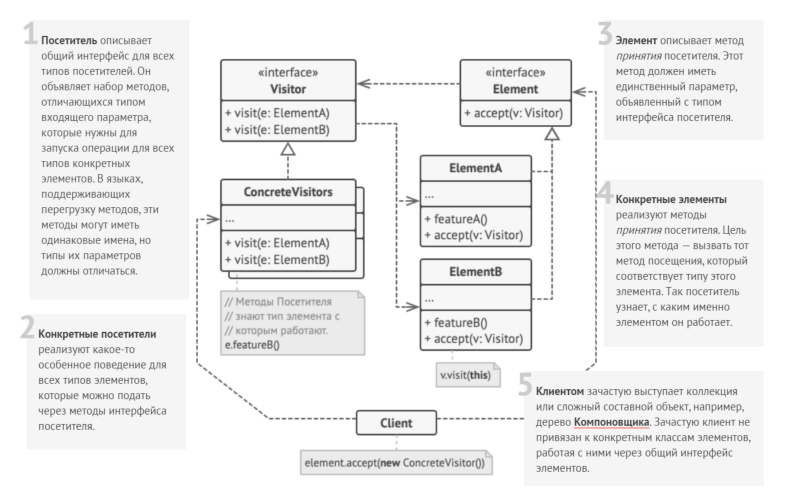

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.figure(figsize=(14,14))
plt.axis('off')
img=mpimg.imread('C:/Users/Сергей/Downloads/Структура Посетитель.png')
imgplot = plt.imshow(img)

### Пример

In [2]:
from abc import ABC, abstractmethod
from typing import List

class Spy(ABC):
    """
    Шпион - посетитель
    """

    @abstractmethod
    def visit_military_base(self, military_base: 'MilitaryBase') -> None:
        """
        Посетить военную базу морского флота
        """
        pass

    @abstractmethod
    def visit_head_building(self, head_building: 'Head_building') -> None:
        """
        Посетить центральный штаб армии
        """
        pass

class MilitaryFacility(ABC):
    """
    Военный объект - посещаемый объект
    """

    @abstractmethod
    def accept(self, spy: Spy) -> None:
        """
        Принять шпиона-посетителя
        """
        pass


class MilitaryBase(MilitaryFacility):
    """
    Морская база
    """

    def __init__(self) -> None:
        self._nuclear_submarines = 1

    def __repr__(self) -> str:
        return 'На военной базе находится {} атомных подводных лодок'.format(self._nuclear_submarines)
    
    def accept(self, spy: Spy) -> None:
        spy.visit_military_base(self)

    def remove_nuclear_submarine(self) -> None:
        if self._nuclear_submarines:
            self._nuclear_submarines -= 1

    @property
    def is_combat_ready(self) -> bool:
        return self._nuclear_submarines > 0


class Head_building(MilitaryFacility):
    """
    Центральный штаб армии
    """

    def __init__(self) -> None:
        self._generals = 3

    def __repr__(self) -> str:
        return 'В штабе находится {} генералов'.format(self._generals)
    
    def accept(self, spy: Spy) -> None:
        spy.visit_head_building(self)

    def remove_general(self) -> None:
        if self._generals:
            self._generals -= 1

    @property
    def is_command_ready(self) -> bool:
        return self._generals > 0

class ScoutSpy(Spy):
    """
    Разведчик Томас (конкретный шпион)
    """
    def __init__(self):
        self._collected_info = {}


    # Здесь мы уже знаем конкретный тип объекта
    def visit_military_base(self, military_base: MilitaryBase) -> None:
        self._collected_info['base'] = 'Военная база:\n\t{}\n\tБоеготовность: {}'.format(
            str(military_base),
            'Да' if military_base.is_combat_ready else 'Нет'
        )

    def visit_head_building(self, head_building: Head_building) -> None:
        self._collected_info['head_building'] = 'Центральный штаб:\n\t{}\n\tКомандование: {}'.format(
            str(head_building),
            'Функционирует' if head_building.is_command_ready else 'Не функционирует'
        )

    def report(self) -> str:
        return 'Информация от разведчика Томаса:\n{}\n'.format(
            '\n'.join(self._collected_info.values())
        )

class JamesBond(Spy):
    """
    Джеймс Бонд (другой конкретный шпион)
    """

    def visit_military_base(self, military_base: MilitaryBase) -> None:
        # Джеймс Бонд посещает морскую базу
        military_base.remove_nuclear_submarine()     # и взрывает атомную подводную лодку

    def visit_head_building(self, head_building: Head_building) -> None:
        # Джеймс Бонд посещает штаб
        head_building.remove_general()               # ...
        head_building.remove_general()               # ...
        head_building.remove_general()               # последовтельно уничтожает всех генералов


In [3]:
if __name__ == '__main__':
    base = MilitaryBase()
    h_b = Head_building()

    # Не важно какой именно MilitaryFacility
    facilities = [base, h_b] 
    
    scout = ScoutSpy()
    print('Отправляем разведчика Томаса...\n')
    for f in facilities:
        f.accept(scout)

    print(scout.report())

Отправляем разведчика Томаса...

Информация от разведчика Томаса:
Военная база:
	На военной базе находится 1 атомных подводных лодок
	Боеготовность: Да
Центральный штаб:
	В штабе находится 3 генералов
	Командование: Функционирует



In [4]:
    print('Отправляем Бонда на задание...\n')

    spy = JamesBond()
    for f in facilities:
        f.accept(spy)

Отправляем Бонда на задание...



In [5]:
    print('Отправляем разведчика Томаса обновить данные...\n')
    for f in facilities:
        f.accept(scout)

    print(scout.report())

Отправляем разведчика Томаса обновить данные...

Информация от разведчика Томаса:
Военная база:
	На военной базе находится 0 атомных подводных лодок
	Боеготовность: Нет
Центральный штаб:
	В штабе находится 0 генералов
	Командование: Не функционирует



### Преимущества паттерна:
* Упрощает добавление операций, работающих со сложными структурами объектов
* Объединяет родственные операции в одном классе
* Посетитель может накапливать состояние при обходе структуры элементов  

### Недостатки:
* Паттерн не оправдан, если иерархия элементов часто меняется
* Может привести к нарушению инкапсуляции элементов